In [1]:
# Importing important libraries and adjusting figure size
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (10,10)
%matplotlib inline

In [8]:
## Data preprocessing
df = pd.read_csv("lego_sets.csv") #Creating a Pandas Dataframe

# Dropping all unnecessary columns
df = df.drop(["ages","prod_desc","prod_id","prod_long_desc", 
              "review_difficulty", "set_name", "theme_name", 
              "country"], axis = 1)

# Dropping all nan values
df = df.dropna(axis = 0, how ='any')

# Resetting index
df = df.reset_index().drop(['index'], axis=1)

In [9]:
# Validating all nan were dropped
df["val_star_rating"].unique()

array([4. , 4.1, 4.3, 4.4, 4.5, 3.6, 4.2, 3.5, 4.8, 5. , 4.7, 3. , 4.6,
       4.9, 3.8, 3.3, 2.5, 2.7, 2.2, 2.3, 2.8, 2. , 2.9, 3.2, 3.9, 3.4,
       2.6, 3.7, 1. , 1.8, 2.4, 1.9, 3.1])

In [10]:
df.describe()

,list_price,num_reviews,piece_count,play_star_rating,star_rating,val_star_rating
count,10466.000000,10466.000000,10466.000000,10466.000000,10466.000000,10466.000000
mean,70.436748,17.088859,552.525511,4.336375,4.508016,4.228960
std,97.893772,36.614558,875.082280,0.652030,0.519309,0.660282
min,2.272400,1.000000,1.000000,1.000000,1.800000,1.000000
25%,20.986000,2.000000,115.000000,4.000000,4.300000,4.000000
50%,36.587800,6.000000,249.000000,4.500000,4.600000,4.300000
75%,79.287800,14.000000,603.000000,4.800000,4.900000,4.700000
max,1104.870000,367.000000,7541.000000,5.000000,5.000000,5.000000


In [11]:
# Extracting each column into an array
price, n_reviews, n_pieces, p_rating, rating, v_rating = df.T.values

## Visualizing the dataset using 2 variables: price and rating

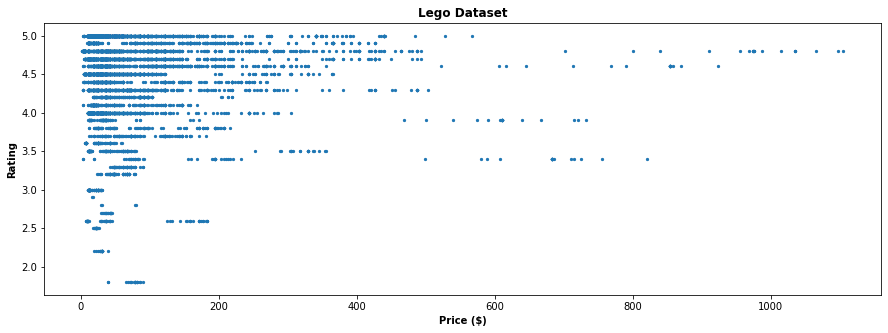

In [12]:
fig = plt.figure(figsize = (15, 5)) 
plt.scatter(price, rating, s=5)
plt.xlabel('Price ($)', fontweight = 'bold')
plt.ylabel('Rating', fontweight = 'bold')
plt.title('Lego Dataset', fontweight = 'bold')
plt.show()

## Price vs Rating

In [13]:
# Split 80% into a training set, 20% into a test set
price_train, price_test, rating_train, rating_test = train_test_split(price, rating, train_size=0.8, random_state=42)

In [14]:
## Creating the augmented matrix (A1)
# Creating column of ones
ones = np.ones((len(rating_train),1))

# Combining columns to make A1
A1 = np.hstack((ones,price_train.reshape(-1,1)))

In [15]:
# Solving for the weight vector
w1 = np.linalg.lstsq(A1,rating_train,rcond=None)[0]

In [16]:
# Price vs Rating model:
print("Rating =", w1[0], "+", w1[1],"* price")

Rating = 4.50316992517752 + 3.2985250543984644e-05 * price


In [17]:
## Predict ratings according the model
# Creating a smooth range
X1 = np.linspace(min(price_test), max(price), len(price_test))

# Predicting
rating_pred1 = w1[0] + X1*w1[1]

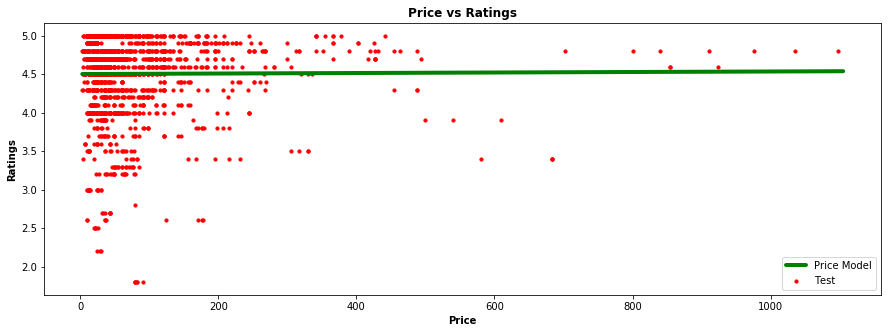

In [19]:
## Visualize the model
fig = plt.figure(figsize = (15, 5)) 
plt.scatter(price_test, rating_test, color='r', label='Test', s=10) # Plot test data points

# Plot the model
plt.title("Price vs Ratings", fontweight = 'bold')
plt.ylabel("Ratings", fontweight = 'bold')
plt.xlabel("Price", fontweight = 'bold')
plt.plot(X1, rating_pred1, color='g', label='Price Model', linewidth=4, solid_capstyle='round')
plt.legend()
plt.show()

## Number of Reviews vs Rating

In [20]:
# Split 80% into a training set, 20% into a test set
reviews_train, reviews_test = train_test_split(n_reviews, train_size=0.8, random_state=42)

In [21]:
# Combining columns to make A2
A2 = np.hstack((ones,reviews_train.reshape(-1,1)))

In [22]:
# Solving for the weight vector
w2 = np.linalg.lstsq(A2,rating_train,rcond=None)[0]

In [23]:
# N_reviews vs Rating model:
print("Rating =", w2[0], "+", w2[1],"* n_reviews")

Rating = 4.5021947183175515 + 0.00019477216892437664 * n_reviews


In [24]:
## Predict ratings according the model
X2 = np.linspace(min(reviews_test), max(reviews_test), len(reviews_test)) # Creating a smooth range

# Predicting
rating_pred2 = w2[0] + X2*w2[1]

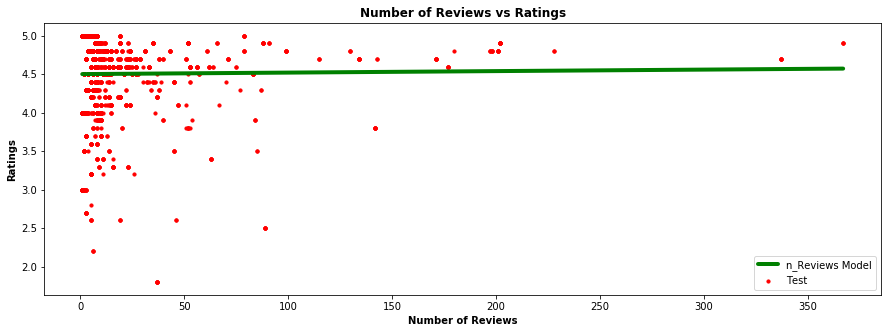

In [25]:
## Visualize the model
fig = plt.figure(figsize = (15, 5)) 
plt.scatter(reviews_test, rating_test, color='r', label='Test', s=10) # Plot test data points 
## Plot the model
# plt.margins(0.016) # Zooming in

# Plotting
plt.title("Number of Reviews vs Ratings", fontweight = 'bold')
plt.ylabel("Ratings", fontweight = 'bold')
plt.xlabel("Number of Reviews", fontweight = 'bold')
plt.plot(X2, rating_pred2, color='g', label='n_Reviews Model', linewidth=4, solid_capstyle='round')
plt.legend()
plt.show()


## Number of Pieces vs Rating

In [26]:
# Split 80% into a training set, 20% into a test set
pieces_train, pieces_test = train_test_split(n_pieces, train_size=0.8, random_state=42)

In [27]:
# Combining columns to make A4
A3 = np.hstack((ones,pieces_train.reshape(-1,1)))

In [28]:
# Solving for the weight vector
w3 = np.linalg.lstsq(A3,rating_train,rcond=None)[0]

In [29]:
# N_reviews vs Rating model:
print("Rating =", w3[0], "+", w3[1],"* n_pieces")

Rating = 4.478583337287597 + 4.8427681653333844e-05 * n_pieces


In [30]:
## Predict ratings according the model
X3 = np.linspace(min(pieces_test), max(pieces_test), len(pieces_test)) # Creating a smooth range

# Predicting
rating_pred3 = w3[0] + X3*w3[1]

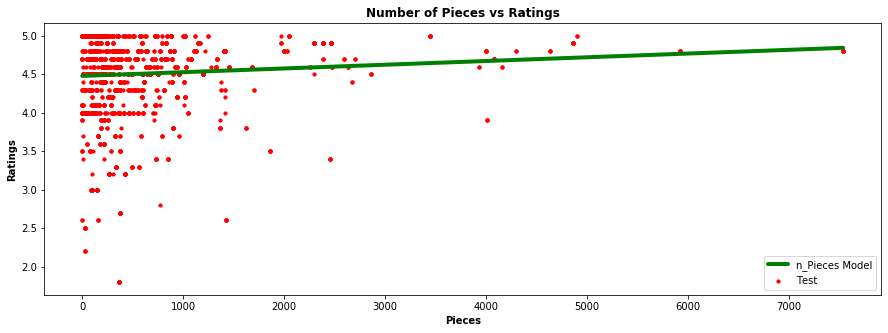

In [32]:
## Visualize the model
fig = plt.figure(figsize = (15, 5)) 
plt.scatter(pieces_test, rating_test, color='r', label='Test', s=10) # Plot test data points

## Plot the model
plt.title("Number of Pieces vs Ratings", fontweight = 'bold')
plt.ylabel("Ratings", fontweight = 'bold')
plt.xlabel("Pieces", fontweight = 'bold')
plt.plot(X3, rating_pred3, color='g', label='n_Pieces Model', linewidth=4, solid_capstyle='round')
plt.legend()
plt.show()

## Play Rating vs Rating

In [33]:
# Split 80% into a training set, 20% into a test set
playrating_train, playrating_test = train_test_split(p_rating, train_size=0.8, random_state=42)

In [34]:
# Combining columns to make A4
A4 = np.hstack((ones,playrating_train.reshape(-1,1)))

In [35]:
# Solving for the weight vector
w4 = np.linalg.lstsq(A4,rating_train,rcond=None)[0]

In [36]:
# Play Rating vs Rating model:
print("Rating =", w4[0], "+", w4[1],"* play_rating")

Rating = 2.406260249247776 + 0.4842928093651265 * play_rating


In [37]:
## Predict ratings according the model
X4 = np.linspace(min(playrating_test), max(playrating_test), len(playrating_test)) # Creating a smooth range

# Predicting
rating_pred4 = w4[0] + X4*w4[1]

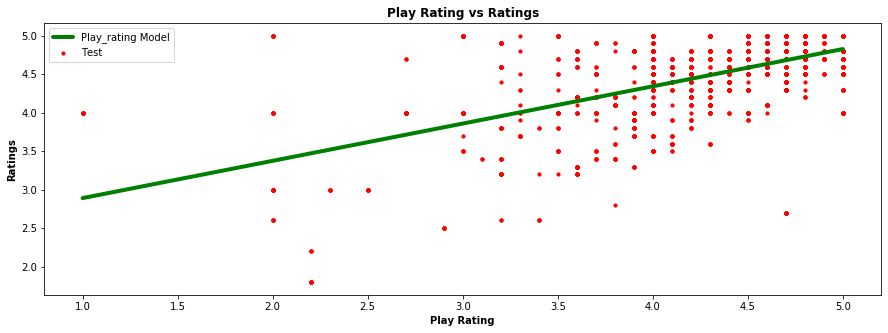

In [38]:
## Visualize the model
fig = plt.figure(figsize = (15, 5)) 
plt.scatter(playrating_test, rating_test, color='r', label='Test', s=10) # Plot test data points

## Plot the model
plt.title("Play Rating vs Ratings", fontweight = 'bold')
plt.ylabel("Ratings", fontweight = 'bold')
plt.xlabel("Play Rating", fontweight = 'bold')
plt.plot(X4, rating_pred4, color='g', label='Play_rating Model', linewidth=4, solid_capstyle='round')
plt.legend()
plt.show()

## Value Rating vs Rating

In [39]:
# Split 80% into a training set, 20% into a test set
valrating_train, valrating_test = train_test_split(v_rating, train_size=0.8, random_state=42)

In [40]:
# Combining columns to make A5
A5 = np.hstack((ones,valrating_train.reshape(-1,1)))

In [41]:
# Solving for the weight vector
w5 = np.linalg.lstsq(A5,rating_train,rcond=None)[0]

In [42]:
# Value Rating vs Rating model:
print("Rating =", w5[0], "+", w5[1],"* value_rating")

Rating = 2.064840736852585 + 0.5774682867232003 * value_rating


In [43]:
## Predict ratings according the model
X5 = np.linspace(min(valrating_test), max(valrating_test), len(valrating_test)) # Creating a smooth range
 
# Predicting
rating_pred5 = w5[0] + X5*w5[1]

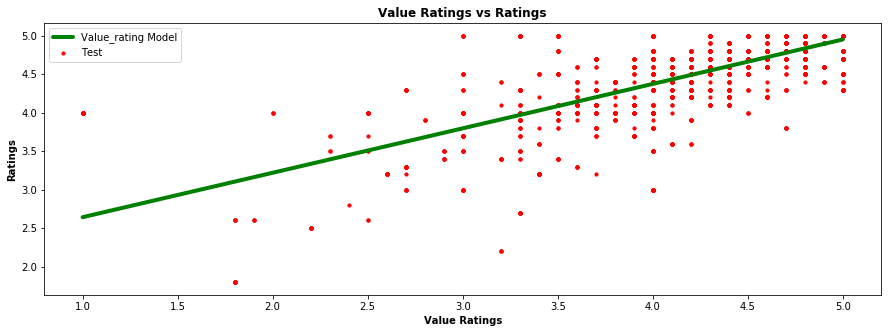

In [44]:
## Visualize the model
fig = plt.figure(figsize = (15, 5)) 
plt.scatter(valrating_test, rating_test, color='r', label='Test', s=10) # Plot test data points

## Plot the model
plt.title("Value Ratings vs Ratings", fontweight = 'bold')
plt.ylabel("Ratings", fontweight = 'bold')
plt.xlabel("Value Ratings", fontweight = 'bold')
plt.plot(X5, rating_pred5, color='g', label='Value_rating Model', linewidth=4, solid_capstyle='round')
plt.legend()
plt.show()

## Multivariate

In [45]:
# Combining columns to create A6
A6 = np.hstack((ones,price_train.reshape(-1,1), reviews_train.reshape(-1,1), pieces_train.reshape(-1,1), playrating_train.reshape(-1,1), valrating_train.reshape(-1,1)))

In [46]:
# Solving for the weight vector
w6 = np.linalg.lstsq(A6,rating_train,rcond=None)[0]

In [47]:
# Multivariate Model
print("Rating =", w6[0], "+", w6[1],"* price + ", w6[2],"* n_reviews + ", w6[3], "* n_pieces +", w6[4], "* play_rating + ", w6[5], "* value_rating")

Rating = 1.4486362549329914 + -3.615873809293107e-05 * price +  -9.028212067069291e-05 * n_reviews +  2.230708754698968e-05 * n_pieces + 0.26697919681358007 * play_rating +  0.4474868792799021 * value_rating


In [48]:
# Predicting
rating_pred6 = w6[0] + X1*w6[1] + X2*w6[2] + X3*w6[3] + X4*w6[4] + X5*w6[5]

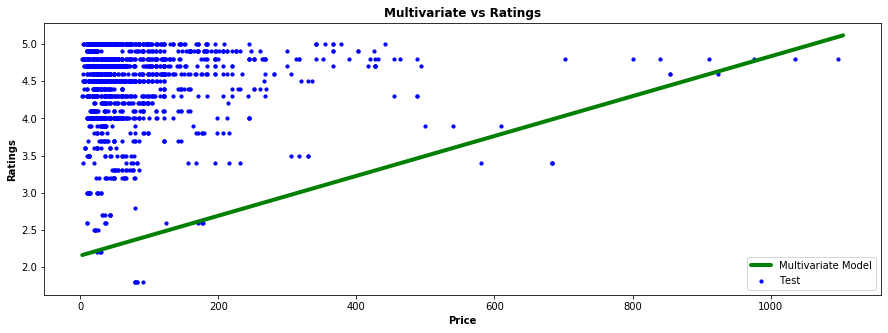

In [49]:
## Visualize the model using only price as the x coordinates
fig = plt.figure(figsize = (15, 5)) 
plt.scatter(price_test, rating_test, color='b', label='Test', s=10) # Plot test data points

## Plot the model
plt.title("Multivariate vs Ratings", fontweight = 'bold')
plt.ylabel("Ratings", fontweight = 'bold')
plt.xlabel("Price", fontweight = 'bold')
plt.plot(X1, rating_pred6, color='g', label='Multivariate Model', linewidth=4, solid_capstyle='round')
plt.legend()
plt.show()

## MSE Comparison

In [50]:
# MSE for the different predictions
from sklearn.metrics import mean_squared_error 
mse1 = mean_squared_error(rating_test,rating_pred1) 
mse2 = mean_squared_error(rating_test,rating_pred2) 
mse3 = mean_squared_error(rating_test,rating_pred3) 
mse4 = mean_squared_error(rating_test,rating_pred4) 
mse5 = mean_squared_error(rating_test,rating_pred5)
mse6 = mean_squared_error(rating_test,rating_pred6)

In [51]:
print("MSE for Price vs Rating:", mse1)
print("MSE for Number of Reviews vs Rating:", mse2)
print("MSE for Number of Pieces vs Rating:", mse3)
print("MSE for Play Rating vs Rating:", mse4)
print("MSE for Value Rating vs Rating:", mse5)
print("MSE for Multivariate Model:", mse6)

MSE for Price vs Rating: 0.26877613222731195
MSE for Number of Reviews vs Rating: 0.2693787754320874
MSE for Number of Pieces vs Rating: 0.2993387803855134
MSE for Play Rating vs Rating: 1.0104633997283317
MSE for Value Rating vs Rating: 1.2268373081930748
MSE for Multivariate Model: 1.759701999523351


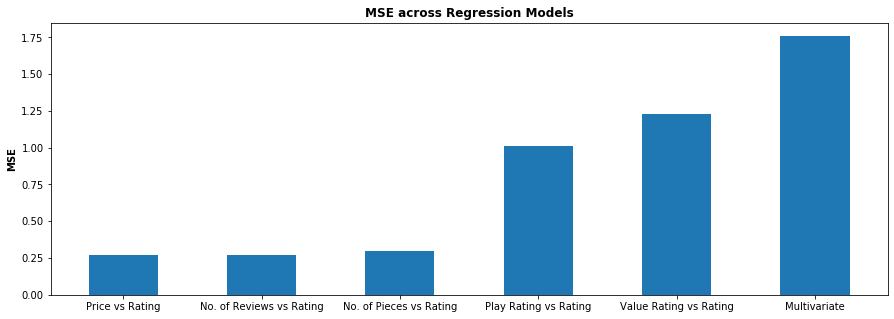

In [53]:
#Plot to show the different MSE values
MSE_dict = {'Price vs Rating':mse1, 'No. of Reviews vs Rating':mse2, 'No. of Pieces vs Rating':mse3,  
        'Play Rating vs Rating':mse4, 'Value Rating vs Rating':mse5, 'Multivariate':mse6} 
dict_keys = list(MSE_dict.keys()) 
dict_values = list(MSE_dict.values()) 

fig = plt.figure(figsize = (15, 5)) 
plt.bar(dict_keys, dict_values, width = 0.5)
plt.title('MSE across Regression Models', fontweight = 'bold')
plt.ylabel('MSE', fontweight = 'bold')
plt.show()